compare adagard v/s rmsprop v/s adam.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data = np.random.randn(500,2)
theta = np.zeros(2)

In [ ]:
def loss_function(data,theta):
  m  = theta[0]
  b = theta[1]
  loss = 0
  for i in range (0,len(data)):
    x = data[i, 0]
    y = data[i, 1]
    y_hat = (m * x +  b)
    loss = loss + ((y - (y_hat) **2))
  mean_sq_loss = loss / float(len(data))
  return mean_sq_loss
def compute_gradients(data,theta):
  gradients = np.zeros(2)
  N = float(len(data))
  m = theta[0]
  b =theta [1]
  for i in range (len(data)):
    x = data[i, 0]
    y = data[i, 1]
    gradients[0] += -(2 / N)* x*(y - ((m*x)+b))
    gradients[1] += -(2/N) * x * (y - ((theta[0] * x) + b))
  epsilon = 1e-6
  gradients = np.divide(gradients, N + epsilon)
  return gradients

In [ ]:
def AdaGrad(data,theta,lr=1e-2, epsilon =1e-8,num_iterations=100):
  loss=list()
  gradients_sum = np.zeros(theta.shape[0])
  for t in range(num_iterations):
    gradients = compute_gradients(data,theta)
    gradients_sum += gradients **2
    gradients_update = gradients / (np.sqrt(gradients_sum + epsilon))
    theta = theta - (lr * gradients_update)
    loss.append(loss_function(data,theta))
  return loss

In [ ]:
def rmsprop(data, theta, learning_rate=0.01, decay_rate=0.99, epsilon=1e-8, num_iterations=100):
    cache = np.zeros_like(theta)
    losses = []
    for iteration in range(num_iterations):
        gradients = compute_gradients(data, theta)
        cache = decay_rate * cache + (1 - decay_rate) * gradients ** 2
        theta -= learning_rate * gradients / (np.sqrt(cache) + epsilon)
        loss = loss_function(data, theta)
        losses.append(loss)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Loss = {loss}")
    return losses

In [ ]:
def adam_optimizer(data, theta, num_iterations=1000, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_t = np.zeros(2)
    v_t = np.zeros(2)
    t = 0
    loss_history = []
    for iteration in range(num_iterations):
        t += 1
        gradients = compute_gradients(data, theta)
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)
        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        loss = loss_function(data, theta)
        loss_history.append(loss)
    return loss_history, theta


In [ ]:
ada_loss = AdaGrad(data, theta)
rms_loss = rmsprop(data, theta)
adam_loss, _ = adam_optimizer(data, theta)

Iteration 0: Loss = -0.02941837200963329
Iteration 10: Loss = -0.009847989591184728
Iteration 20: Loss = -0.009847989383985614
Iteration 30: Loss = -0.0098479893839855
Iteration 40: Loss = -0.0098479893839855
Iteration 50: Loss = -0.0098479893839855
Iteration 60: Loss = -0.0098479893839855
Iteration 70: Loss = -0.0098479893839855
Iteration 80: Loss = -0.0098479893839855
Iteration 90: Loss = -0.0098479893839855


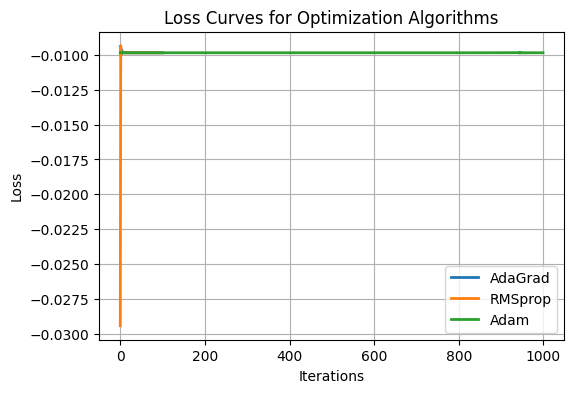

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(ada_loss, label='AdaGrad',  linewidth=2)
plt.plot(rms_loss, label='RMSprop', linewidth=2)
plt.plot(adam_loss, label='Adam',  linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Optimization Algorithms')
plt.legend()
plt.grid(True)
plt.show()